In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from diffeqpy import de # 初回は５-１０分程度かかるかも
import matplotlib.pyplot as plt
from juliacall import Main as jl
from SanoSawada import SanoSawada
import numpy as np

# Lorenz 方程式の場合

In [3]:
# parameters
transient = 20.
t_end = 4000.
dt = 1e-2
p = np.array([16.,40.,4.])
u0 = np.array([2.,0.,0.])

obs_idx = 0
epsilon = 0.015
num_neighbor = 10
step_jac = 10
jac_len = 1000
td_idx = -10*np.array([0,1,2])

lorenz = de.seval("""
function lorenz(du,u,p,t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end""")

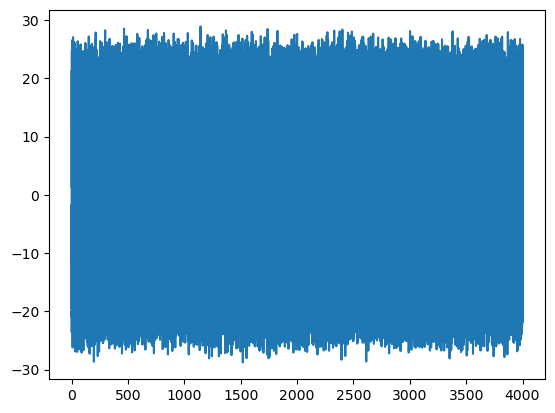

In [4]:
u0 = np.array([2.,0.,0.])

# transient 
tspan = (0., transient)
prob = de.ODEProblem(lorenz, u0, tspan, p)
sol = de.solve(prob)

# steps_on_attractor
u0 = sol.u[-1]
tspan = (0., t_end)
prob = de.ODEProblem(lorenz, u0, tspan, p)
sol = de.solve(prob,saveat=dt)

# convert sol to numpy array
sol_t = np.array(sol.t)
sol_partial_obs = np.stack([u_i[obs_idx] for u_i in sol.u])

plt.plot(sol_t,sol_partial_obs)
plt.show()

In [8]:
ss = SanoSawada(sol_partial_obs,num_neighbor,dt,step_jac,jac_len,epsilon,td_idx)
ss.set_radius_of_ball_for_neighboring_points_search()
print(ss.radius)
ss.jacobian_reconstruction()
ss.bns_steps()
ss.estimate_lyapunov_spectrum(transient=100)

0.8646874439693223
Estimated Lyapunov spectrum: [  1.23710672   0.02457671 -13.76176618]
